# Phase 5

## 1. Introduction

### Research Question
Overall, our research questions are: <b>Is it possible to create a loan approval prediction model that balances fairness and "accuracy" in the form of predictive equality and recall? If so, does this model have any biases towards or against any groups?</b>

Inputs: `Applicant Race` (C), `Applicant Sex` (C), `Loan Type` (C), `Property Type` (C), `Loan Purpose` (C), `Loan Amount` (N), `Applicant Income` (N) \
Outputs: `Action Taken` (C) \
Evaluation Metrics: Recall, Predictive Equality \
\* (C) represents Categorical (Using Label Encoding) and (N) represents Numerical

The inputs we are interested in are `Applicant Race`, `Applicant Sex`, `Loan Type`, `Property Type`, `Loan Purpose`, `Loan Amount`, `Applicant Income` because `Applicant Income` and `Loan Amount` are, intuitively, the most applicable to whether a loan gets accepted or not. According to [investopedia](https://www.investopedia.com/articles/mortgages-real-estate/08/mortgage-candidate.asp) [1], credit score, debt, income, and appraisal value have an impact on whether an applicant has successfully gets a mortgage, so we believe that these variables can be the most indicative of these measures. We're including `Applicant Race`, `Applicant Sex` because these factors should not affect whether an applicant gets approved or not; these are sensitive features that by themselves should not affect the loan application outcome.

The main output we want to check is `Action Taken`, because this column indicates whether the loan was approved or not (aka originated). Another potential column of interest is `Denial Reason 1`, `Denial Reason 2`, or `Denial Reason 3` because it could be good supplemental information as to what was faulty about the application, however the denial reason for most applicants will be undefined since most loans in the dataset are approved.

Our main evaluation metric is recall because we believe that telling an applicant that they can't get a loan when they actually can is more detrimental than saying they can when they can't. Although there is the time aspect that goes into applying for a loan, it's better to apply and get rejected than not apply at all, because there is still a chance that the applicant could have gotten funding. However, although we are focusing on recall, we will still check other metrics like precision/F1 to make sure there isn't too much of a skew in the data.

We will also evaluate across the sensitive features for fairness, focusing on predictive equality, but also taking into consideration statistical parity and calibration. We consider predictive equality to be the main focus because we want to ensure that our model isn't unfairly predicting one race/gender/ethnicity would fail to get a loan compared to others.

### Hypotheses
We predict that white people and males will be the most likely to get approved in our model. This is due to the skew in our data towards a large amount of white people and males. This skew may be due to the makeup of the United States, which is majority white. Conventional loans also appear to be the most general and therefore most common type of loan we would see. By ensuring that our data is even across the different sensitive features, we predict that the model, in turn, will become more fair and representative for each sex, race, and ethnicity.

### Importance
Loans are an important part to financial stability and should be accessible to everyone who deserves it. Our model will provide some insight on the fairness of the loan approval process when it relates to minorities, and the impact of protected traits in the approval process. This relates to algorithmic fairness as our model will be trained to balance fairness and "accuracy" (predictive equality and recall). In theory, a fair model should yield fair results (in accordance with our definition of fairness); we want to test if this is true to bring attention to the current state of the loan approval process and raise conversation on the transparency of reasons for denial.


### Related Work
While there aren't any formal and notable works on loan approval, there are papers covering similar topics of the role of protected traits such as gender or race in the context of financial opportunities. For example, the paper [Leveraging Gender Proxies Can Lead to Fairer Credit Risk Predictions](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4602450) [2] evaluates gender bias in algorithms, using alternative data to evaluate credit risk prediction. Its takeaways include the fact incorporating strong gender proxies into the credit scoring process can potentially reduce the gender gap in credit risk prediction accuracy and credit allocation. This paper lies in the same domain as our project in the sense that they are both discovering ways to increase fairness in models that deal with data amongst different groups of people. Another paper that covers similar themes as our project is [Algorithmic Bias, Financial Inclusion, and Gender](https://www.womensworldbanking.org/wp-content/uploads/2021/02/2021_Algorithmic_Bias_Report.pdf) [3], which explores the use of synthetic data to discover potential areas of gender-based bias in relation to digital credit. This paper discusses different ways to avoid the historical themes of bias in relation to gender when using machine learning and artifiical intelligence. This is similar to our project's goal of discovering potential biases in the current state of the loan approval process and creating a model that is fair and mitigates this discrimination. The reason why no notable loan approval papers exist could be due to the fact that loan approval data is difficult to deal with and not as transparent as credit risk or digital credit. Credit is also something that is applicable to bigger groups of people; more people use credit cards than people that buy houses or run businesses, which is why the call for papers examining fairness for loan approvals is probably lower. Furthermore, loan approval data is also difficult because it is a more tedious task than something like applying for a credit card.

## 2. Datasheet

### Rows and Columns
The data consists of 29 columns and 9,793,702 rows. The columns are defined as such.
`respondent_id`: A 10 character identifier for each respondent. 
`agency_code`: Indicates the agency that the data is from, with codes 1 - Office of the Comptroller of the Currency (OCC), 2 - Federal Reserve System (FRS), 3 - Federal Deposit Insurance Corporation (FDIC), 5 - National Credit Union Administration (NCUA), 7 - Department of Housing and Urban Development (HUD), 9 - Consumer Financial Protection Bureau (CFPB). 
`loan_type`: Type of loan, with 1 - Conventional, 2 - FHA-insured, 3 - VA-guaranteed, 4 - FSA/RHS. 
`property_type`: 1 - One to four-family, 2 - Manufactured housing, 3 - Multifamily.
`loan_purpose`: 1 - Home purchase, 2 - Home improvement, 3 - Refinancing.
`owner_occupancy`: 1 - Owner-occupied as principal dwelling, 2 - Not owner-occupied, 3 - Not applicable.
`loan_amount_000s`: Loan amount in thousands of dollars.
`preapproval`: 1 - Preapproval requested, 2 - Not requested, 3 - Not applicable.
`action_taken`: 1 - Loan originated, 2 - Application approved but not accepted, 3 - Application denied, 4 - Application withdrawn, 5 - File closed for incompleteness, 6 - Purchased loan, 7 - Preapproval denied, 8 - Preapproval approved but not accepted.
`msamd`: Metropolitan Statistical Area/Metropolitan Division code.
`state_code`: Two-digit FIPS state identifier code.
`county_code`: Three-digit FIPS county identifier code.
`census_tract_number`: Census tract number.
`applicant_ethnicity`: 1 - Hispanic or Latino, 2 - Not Hispanic or Latino, 3 - Not provided, 4 - Not applicable, 5 - No co-applicant.
`co_applicant_ethnicity`: Same codes as applicant_ethnicity for co-applicant.
`applicant_race_1`: 1 - American Indian/Alaska Native, 2 - Asian, 3 - Black/African American, 4 - Hawaiian/Pacific Islander, 5 - White, 6 - Not provided, 7 - Not applicable, 8 - No co-applicant.
`co_applicant_race_1`: Same codes as applicant_race_1 for co-applicant.
`applicant_sex`: 1 - Male, 2 - Female, 3 - Not provided, 4 - Not applicable, 5 - No co-applicant.
`co_applicant_sex`: Same codes as applicant_sex for co-applicant.
`applicant_income_000s`: Applicant gross annual income in thousands of dollars.
`purchaser_type`: 0 - Not originated or sold, 1 - Fannie Mae, 2 - Ginnie Mae, 3 - Freddie Mac, 4 - Farmer Mac, 5 - Private securitization, 6 - Commercial/savings bank, 7 - Life insurance/credit union/mortgage bank, 8 - Affiliate, 9 - Other purchaser.
`hoepa_status`: 1 - HOEPA loan, 2 - Not a HOEPA loan (for originated/purchased loans only).
`lien_status`: 1 - Secured by first lien, 2 - Secured by subordinate lien, 3 - Not secured by lien, 4 - Not applicable for purchased loans (applications/originations only).
`population`: Total population in the census tract.
`minority_population`: Percentage of minority population to total population for the tract (carried to two decimal places).
`hud_median_family_income`: FFIEC Median family income in dollars for the MSA/MD in which the tract is located (adjusted annually by FFIEC).
`tract_to_msamd_income`: Percentage of tract median family income compared to MSA/MD median family income (carried to two decimal places).
`number_of_owner_occupied_units`: Number of dwellings, including individual condominiums, that are lived in by the owner.
`number_of_1_to_4_family_units`: Dwellings that are built to house fewer than 5 families.
### Purpose of Dataset
The dataset was created by the Consumer Financial Protection Bureau (CFPB), which is a government entity. The CFPB is tasked with enforcing fair lending laws like the Equal Credit Opportunity Act. The bureau collects mortgage and loan data, so they can monitor for potential discriminatory lending patterns based on factors like race, gender, age, etc. Financial institutions are required by the Home Mortgage Disclosure Act (HMDA) to report lending data to the CFPB.
### Dataset funding
Since the CFPB is a government organization, taxpayers funded for the creation for this dataset.
### Influences in data reporting
The government strictly outlines what values to include in the data. A [reference chart](https://files.consumerfinance.gov/f/documents/cfpb_reportable-hmda-data_regulatory-and-reporting-overview-reference-chart_2023-02.pdf) [4] is given to the employees at financial instutions on which data to report and how to do so. The [implementation and guidelines material](https://www.consumerfinance.gov/rules-policy/regulations/1003/) [5] also explain the different sections of of the HDMA and how to comply with each section. The law says that instiutions must report requests only if preapproval requests are denied, are approved by the financial institution but not accepted by the applicant, or result in the origination of home purchase loans.
### Preprocessing
The CSV file that is released by the CFPB has no preprocessing at all. It is a compiled dataset which consists of all the reports by the financial institutions.
### Involement of People and Knowledge of Data Use
The financial institutions and the government are aware of the data collection and know that the purpose is for auditing and consumer safety. Financial institutions are also required to give privacy notices to their customers that tells them what data is being collected and how it's used. This is because they are obligated to comply with the privacy component of the [Gramm-Leach-Bliley Act](https://www.ftc.gov/business-guidance/resources/how-comply-privacy-consumer-financial-information-rule-gramm-leach-bliley-act#obligations) [6].
### Raw Data Source
The raw data can be found at the [HDMA data](https://www.consumerfinance.gov/data-research/hmda/historic-data/?geo=nationwide&records=all-records&field_descriptions=codes) [7] section of the CFPB website next to the year 2017.

## 3. Cleaned data imports

Our data is found in [7]. Due to the large size of the original dataset and cleaned dataset, datasets are stored in in google drive: https://drive.google.com/drive/folders/1oNUOrG1_ZI_am0-SgtbVz1BozbwqORFk?usp=drive_link?


The corresponding code information comes from [8]. The github link for our repository is in https://github.com/AtulyaL/INFO4390_Project

In [1]:
# Directly import cleaned data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned = pd.read_csv("cleaned_data.csv")

The data cleaning process was done in datacleaning.ipynb. After reading the documentation from the website and scanning the dataset, columns and rows were carefully selected. Columns without an important meaning to our research question, such as `application_date_indicator`, and columns with insufficient information (missing information larger than 30%), were dropped for the conciseness of the dataset. After that, rows with na values were dropped, such as `sequence_number`, `co_applicant_race_5` (which are listed in the datacleaning.ipynb). To compare the gender difference in the data of 2017, non-2017 data and columns where sex != 1 or 2 were dropped. Finally, the cleaned data is saved as "cleaned_data.csv" for analysis. It includes columns of interest, such as `applicant_sex`, `action_taken`, etc.

## 4. Summarize the data

6 figures with 1 table are presented in the section.

In [2]:
import pandas as pd
print("Dataset summary:")
print("Number of Rows in the cleaned dataset: ", len(df_cleaned.axes[0]))
print("Number of Columns in the cleaned dataset: ", len(df_cleaned.axes[1]))

Dataset summary:
Number of Rows in the cleaned dataset:  9793702
Number of Columns in the cleaned dataset:  29


In [3]:
df_cleaned.columns
relevent_num = ['applicant_income_000s','loan_amount_000s']
relevant_cat = ['applicant_race_1','applicant_sex', 'action_taken']
race_mapping = {
    1: 'Native American',
    2: 'Asian',
    3: 'Black',
    4: 'Native Hawaiian/Pacific Islander',
    5: 'White',
    6: 'Not Provided',
    7: 'N/A',
    8: 'No co-applicant'
}
sex_mapping = {
    1: 'Male',
    2: 'Female'
}
action_taken_mapping = {
    1: 'Originated',
    2: 'Approved but not accepted',
    3: 'Denied',
    4: 'Withdrawn',
    5: 'Incomplete and Closed',
    6: 'Loan purchased',
    7: 'Preapproval denied',
    8: 'Preapproval request approved but not accepted'
}

df_cleaned['applicant_sex'] = df_cleaned['applicant_sex'].map(sex_mapping)
df_cleaned['applicant_race_1'] = df_cleaned['applicant_race_1'].map(race_mapping)
df_cleaned['action_taken'] = df_cleaned['action_taken'].map(action_taken_mapping)

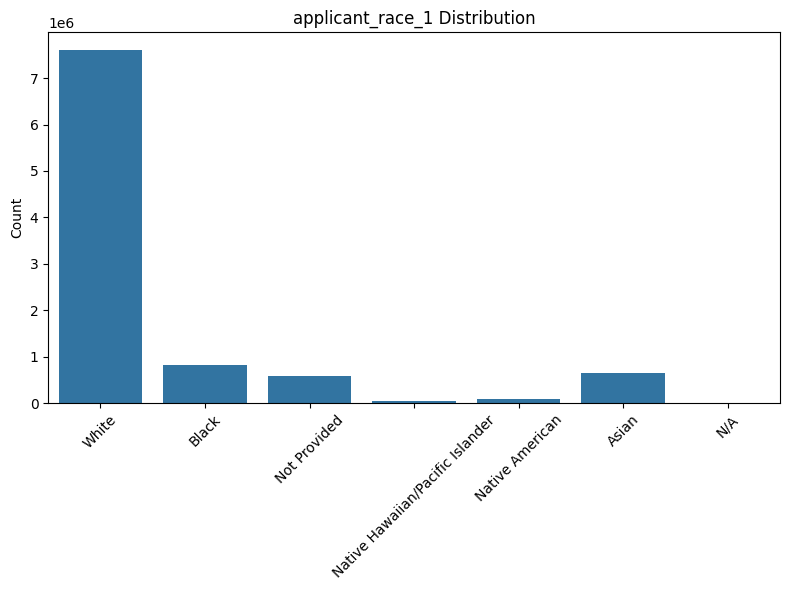

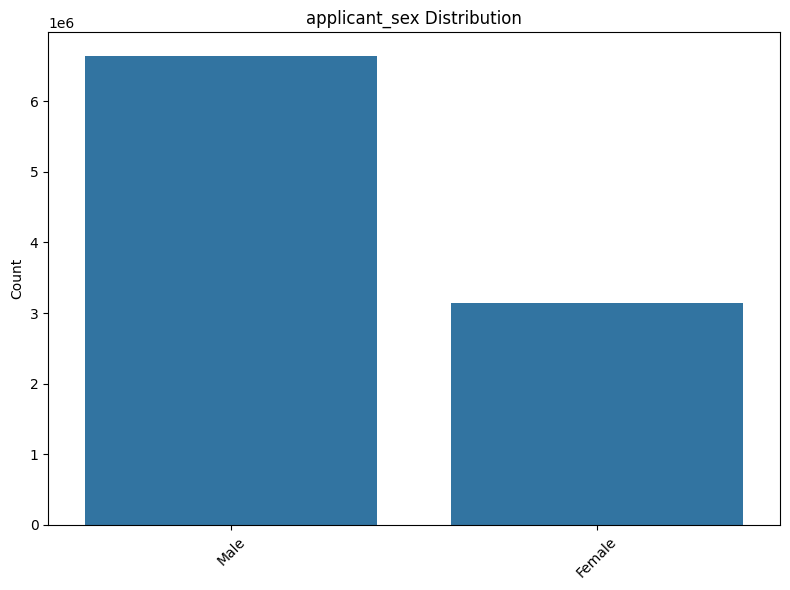

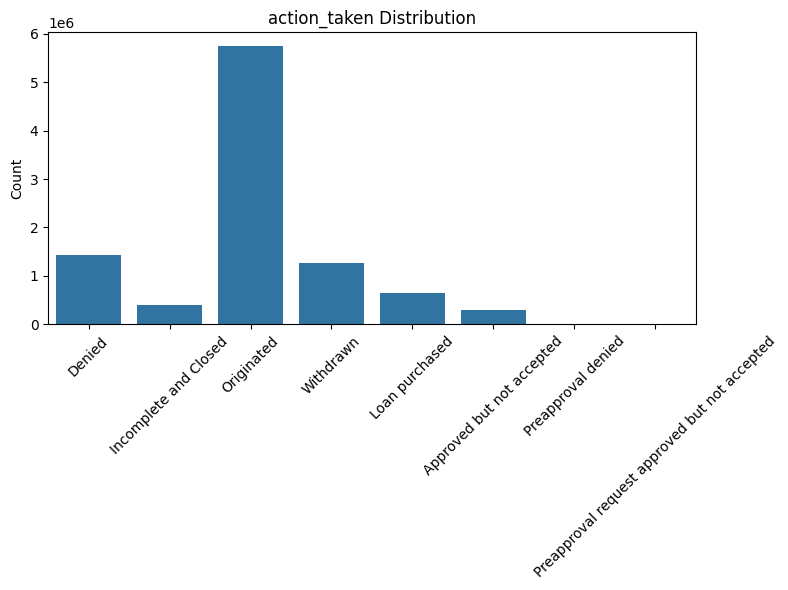

Summary Statistics for Numerical Variables:
       applicant_income_000s  loan_amount_000s
count           9.793702e+06      9.793702e+06
mean            1.119321e+02      2.420835e+02
std             2.301547e+03      5.762923e+02
min             1.000000e+00      1.000000e+00
25%             5.300000e+01      1.200000e+02
50%             8.100000e+01      1.960000e+02
75%             1.260000e+02      3.030000e+02
max             7.073045e+06      4.040000e+05


In [7]:
for var in relevant_cat:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_cleaned, x=var)
    plt.title(f'{var} Distribution')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Display summary statistics
numerical_summary = df_cleaned[relevent_num].describe()
print("Summary Statistics for Numerical Variables:")
print(numerical_summary)

In figure 1: applicant_race_1 Distribution presents the distribution of the loan applicant's race, to better evaluate the input variable of the research question. There is a significantly large number of white applicants. Black applicants, Asian applicants, with those who are not providing race information in mail, Internet, or telephone application are the 2nd, 3rd and 4th largest groups. There are a small number of Native Hawaiian/Pacific Islander and Native American applicants. The distribution of race helps to better visualize the input variable of interest, and indicate the people distribution who are using the system. We hypothesize that "White people (and males) will be the most likely to get approved in our model". The race distribution, of white people being the largest group using the system, also shows their preference in using the system when applying for loans. 

figure 2: applicant_sex Distribution, presents the distribution of the loan applicant's gender, to better visualize and evaluate another input variable. More men are using the system than females. The gender distribution, of men being the largest group using the system, with Table 1 showing white people being the largest group, also shows white people and male preference in using the system when applying for loans. As hypothesized, they may be most likely to be approved, thus a large number of them are using it.

In figure 3: action_taken Distribution, visualizes the loan approval results of applicants. It presents the distribution of the output of the research question. There is a significantly large group of originated, which are about 4 times as large as the denied group. The denied group, and withdrawn are the 2nd and 3rd largest groups. Loans purchased, incomplete and closed, and approved but not accepted are the 4th, 5th and, 6th largest groups, which are relatively small. We are going to analyze the connections of approval/denial with race and gender factors in the lateral parts to better study the research question.

Table 1: summary statistics for numerical variables present the mean, standard deviation, max & min, and percentiles of applicant income and amount of loan applied. The average applicant income is 1.12e+05, while the average loan amount applied is 2.42e+05, which is larger than the average applicant income. Applicant income has a larger standard deviation than the loan applied. It's also reflected as the applicant's income max value at 7.07e+09 is much larger than the maximum loan amount at 4.04e+08.

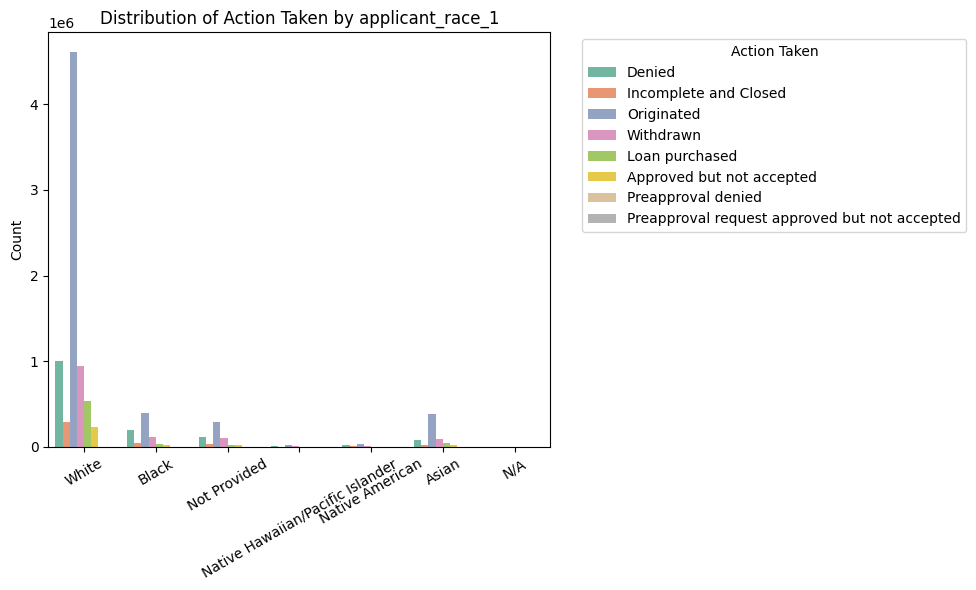

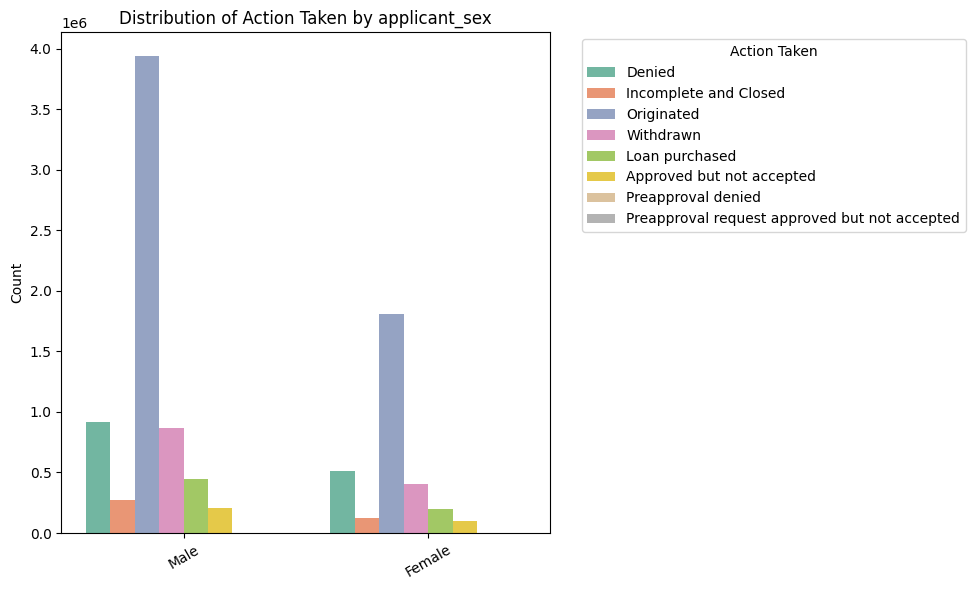

In [8]:
sensitive_subgroups = ['applicant_race_1', 'applicant_sex']
for subgroup in sensitive_subgroups:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cleaned, x=subgroup, hue='action_taken', palette='Set2')
    plt.title(f'Distribution of Action Taken by {subgroup}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.legend(title='Action Taken', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In Figure 4: Distribution of Action Taken by applicant_race_1, we compare the white population with the black population, to better study how race factors influence the approval/denial of a loan. For white people, the number of originated loans is more than 4 times as large as those who are denied, withdrawn, etc. By comparison, although the largest group of black people is also "originated", the difference on amount of people being approved and those who are denied and withdrawn is very small. The figure reflects that race may bring bias in the credit and loan algorithm. Seeing a significantly larger amount of approved cases in the white population than in other populations also further confirms our hypothesis that white people may be more likely to receive approval in the system. However, since there is a population difference between race groups, we will further evaluate the connections of race and action taken in future steps.

In Figure 5: Distribution of Action Taken by applicant_sex, we compare the male population with the female population, to better study how gender factors influence the approval/denial of a loan. For male people, the number of originated loans is about 4 times as large as those who are denied, withdrawn, etc. By comparison, although the largest group of female is also "originated", the difference on amount of people being approved and those who are denied and withdrawn is very small. The figure reflects that gender may bring bias in the credit and loan algorithm. Seeing a significantly larger amount of approved cases in the male population than in female populations also further confirms our hypothesis that male people may be more likely to receive approval in the system. However, since there is a population difference between gender groups, we will further evaluate the connections between gender and actions taken in future steps.

Text(0.5, 1.0, 'Correlation Heatmap')

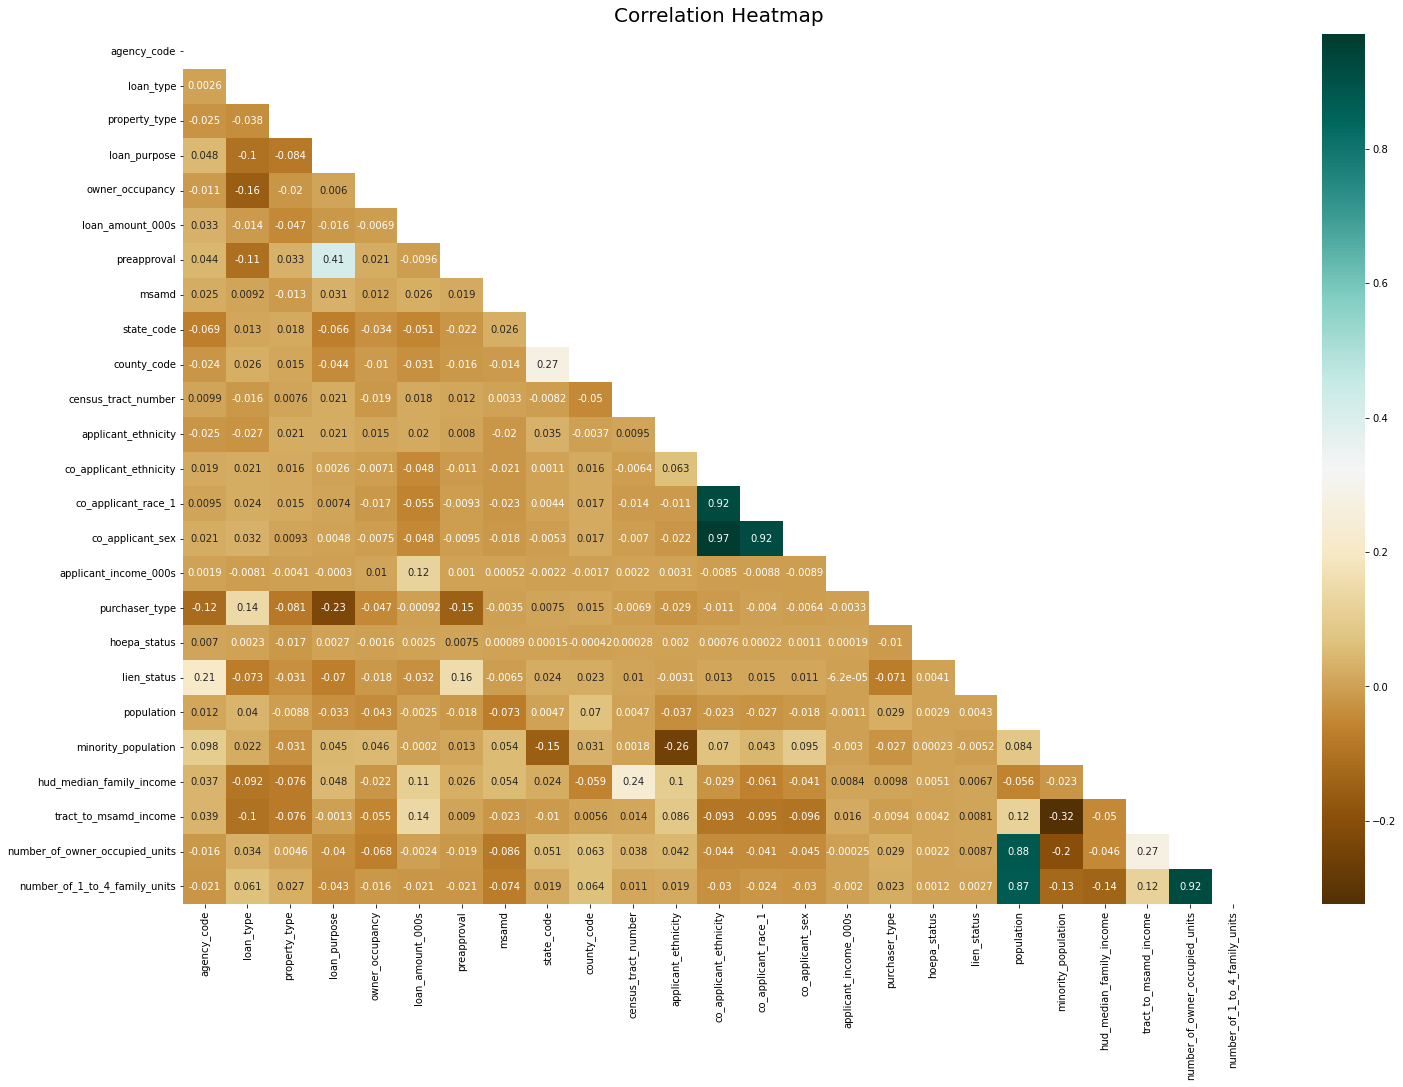

In [4]:
plt.figure(figsize=(24, 16))
mask = np.triu(np.ones_like(df_cleaned.corr(), dtype=bool))
heatmap = sns.heatmap(df_cleaned.corr(), cmap='BrBG', mask = mask, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

In Figure 6: Correlation Heatmap, we compare and evaluate the correlation of factors in the dataset. Seeing the lines of input variables such as applicant_sex, and applicant_race_1, there is no strong correlation of these factors with others (all correlations <0.2). Seeing the output variable of interest, action_taken, the correlation of it with others is also very small (all <=0.2). The strongest correlation we observe is between co_applicant_sex and co_applicant_ethinicity at 0.97, co_applicant_race_1 with co_applicant_ethinicity at 0.92, co_applicant_sex and co_applicant_race_1 at 0.92, and number_of_1_to_4_family_unit and number_of_owner_occupied_units at 0.92. They reflect the connections of gender, race, and ethnicity of co-applicants. The correlation factors, reflecting the connections of factors, can better guide us in evaluating the reason for approval/denial.

## 5. Models

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

import pandas as pd

# Interested Columns
interest_cols = ['agency_code', 'loan_type', 'property_type', 'loan_purpose',
                 'owner_occupancy', 'applicant_ethnicity',
                 'applicant_race_1', 'applicant_sex',
                 'loan_amount_000s', 'applicant_income_000s', 'action_taken']

# Columns that need one-hot encoding
cat_cols = interest_cols[0:5]
sens_feats = interest_cols[5:-3]

df_interest = df_cleaned.sample(n=200000, random_state=42)[interest_cols]

# Encode action_taken as a binary column
df_interest["originated"] = df_interest["action_taken"] == "Originated"
df_interest.drop("action_taken", axis=1, inplace=True)

# Apply one-hot encoding to categorical variables
encoder_s = OneHotEncoder(sparse_output=False)
encoder_c = OneHotEncoder(sparse_output=False)

encoded_sens = encoder_s.fit_transform(df_interest[sens_feats])  # Encode the sensitive features
encoded_cat = encoder_c.fit_transform(df_interest[cat_cols])

encoded_sens_df = pd.DataFrame(encoded_sens, columns=encoder_s.get_feature_names_out(sens_feats))
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder_c.get_feature_names_out(cat_cols))
encoded_comb_df = pd.concat([encoded_sens_df, encoded_cat_df], axis=1)
df_nonprocess = df_interest.drop(cat_cols, axis = 1)

# Combine the encoded categorical data with the numerical data
processed_df = pd.concat([encoded_comb_df, df_nonprocess.reset_index(drop=True)], axis=1)

In [11]:
def split_data(processed):
  # Split the dataset into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(
      processed.drop("originated", axis = 1), processed['originated'],
      test_size=0.33, random_state=42)

  return X_train, X_test, y_train, y_test

In [12]:
X_train, X_test, y_train, y_test = split_data(processed_df)

In [13]:
# Features we'll focus on
feats = list(encoder_c.get_feature_names_out(cat_cols))
feats.extend(['loan_amount_000s', 'applicant_income_000s'])

In [14]:
def get_subgroups(df):
  # Define subgroups based on encoded categorical variables
  subgroups = {
        'Male': df['applicant_sex_Male'] == 1,
        'Female': df['applicant_sex_Female'] == 1,
        'Native American': df['applicant_race_1_Native American'] == 1,
        'Asian': df['applicant_race_1_Asian'] == 1,
        'Black': df['applicant_race_1_Black'] == 1,
        'Native Hawaiian/Pacific Islander': df['applicant_race_1_Native Hawaiian/Pacific Islander'] == 1,
        'White': df['applicant_race_1_White'] == 1,
        'Non-White': (df[['applicant_race_1_Native American', 'applicant_race_1_Asian', 'applicant_race_1_Black', 'applicant_race_1_Native Hawaiian/Pacific Islander']].sum(axis=1) > 0)
    }
  return subgroups

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Returns false positive rate and false negative rate
def pred_eq(fp, fn, tp, tn):
    fpr = fp / (fp + tn)
    fnr = tp / (tp + fn)

    return (fpr, fnr)

# returns predicted positive rate
def stat_par(fp, fn, tp, tn):
    return (tp + fp) / (tp + fn + fp + tn)

def accuracy_report(predict, truth, df):
    report_data = [] 

    recall = recall_score(truth, predict, average="macro")
    accuracy = accuracy_score(truth, predict)
    precision = precision_score(truth, predict, average="macro")
    f1 = f1_score(truth, predict, average="macro")
    tn, fp, fn, tp = confusion_matrix(truth, predict).ravel()
    # predictive equality
    false_pos, false_neg = pred_eq(fp, fn, tp, tn)
    # statistical parity
    pred_pos = stat_par(fp, fn, tp, tn)

    overall_data = ["Overall", recall, accuracy, precision, f1, false_pos, false_neg, pred_pos]
    
    print('Overall:')
    print(f'Recall: {recall}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'F1-score: {f1}')

    report_data.append(overall_data)

    subgroups = get_subgroups(df)

    # Calculate and print metrics for each subgroup
    for subgroup_name, subgroup_mask in subgroups.items():
        truth_subgroup = truth[subgroup_mask]
        predict_subgroup = predict[subgroup_mask]

        recall = recall_score(truth_subgroup, predict_subgroup, average="macro")
        accuracy = accuracy_score(truth_subgroup, predict_subgroup)
        precision = precision_score(truth_subgroup, predict_subgroup, average="macro")
        f1 = f1_score(truth_subgroup, predict_subgroup, average="macro")
        
        tn, fp, fn, tp = confusion_matrix(truth_subgroup, predict_subgroup).ravel()
        # predictive equality
        false_pos, false_neg = pred_eq(fp, fn, tp, tn)
        # statistical parity
        pred_pos = stat_par(fp, fn, tp, tn)

        subgroup_data = [subgroup_name, recall, accuracy, precision, f1, false_pos, false_neg, pred_pos]

        print(f'---{subgroup_name}---')
        print(f'Recall: {recall}')
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'F1-score: {f1}')
        print()

        report_data.append(subgroup_data)
    
    col_names = ["group", "recall", "accuracy", "precision", "f1", "false_positive", "false_negative", "predicted_positive"]

    return pd.DataFrame(report_data, columns=col_names)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fairness(metric_df):
    df = pd.melt(metric_df, id_vars="group", var_name="metric", value_name="rate")

    sns.set_theme(style="whitegrid")
    g = sns.barplot(x='metric', y='rate', hue='group', data=df, palette="CMRmap")
    sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=70)

### Analysis 1

Overall:
Recall: 0.5802947182095863
Accuracy: 0.6231818181818182
Precision: 0.6069257529376607
F1-score: 0.5714035493223537
---Male---
Recall: 0.5806552168005439
Accuracy: 0.6256978270056271
Precision: 0.6080449668655283
F1-score: 0.5720576300034098

---Female---
Recall: 0.57941508108284
Accuracy: 0.6178050287561195
Precision: 0.6044417373978632
F1-score: 0.5698925762626761

---Native American---
Recall: 0.6449305671741676
Accuracy: 0.6399253731343284
Precision: 0.6550035041677229
F1-score: 0.6355090463858499

---Asian---
Recall: 0.5436163722803129
Accuracy: 0.6065649560795192
Precision: 0.5739301487767745
F1-score: 0.5187417985757661

---Black---
Recall: 0.6073202420893362
Accuracy: 0.6032638259292837
Precision: 0.625894292241601
F1-score: 0.5896925643988605

---Native Hawaiian/Pacific Islander---
Recall: 0.5873775260257195
Accuracy: 0.6104294478527608
Precision: 0.6004620462046204
F1-score: 0.583426403855635

---White---
Recall: 0.577778626659077
Accuracy: 0.630163154714333
Precision

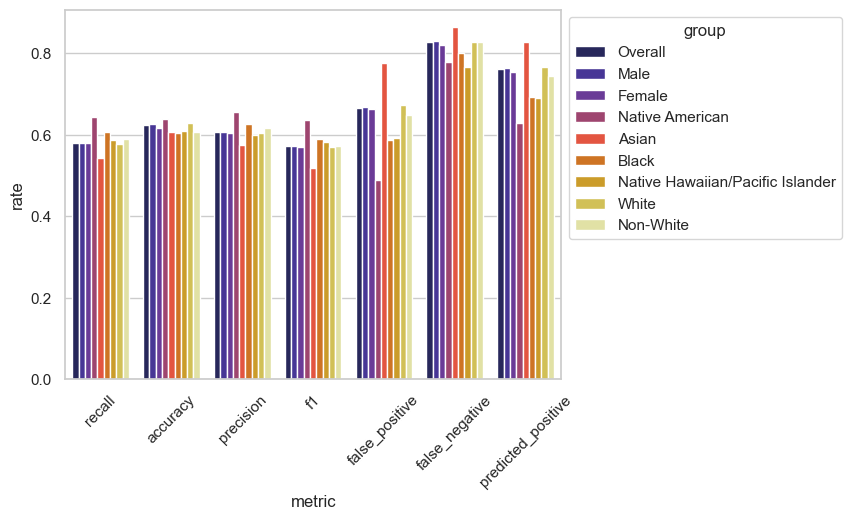

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Model setup
logistic_model = LogisticRegression(max_iter=10000, solver='liblinear', random_state=42)

# scale the features:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[feats])
X_test_scaled = scaler.transform(X_test[feats])

# Training the model
logistic_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_lr = logistic_model.predict(X_test_scaled)

# Reports
lr_metrics = accuracy_report(y_pred_lr, y_test, X_test)

# Plot fairness metrics
plot_fairness(lr_metrics)


### Analysis 2

Overall:
Recall: 0.5830873990890623
Accuracy: 0.6048939393939394
Precision: 0.5874179270295434
F1-score: 0.5834676772627895
---Male---
Recall: 0.5809854622177137
Accuracy: 0.6051244411823581
Precision: 0.5858686490366034
F1-score: 0.5812998303957072

---Female---
Recall: 0.5871751659484983
Accuracy: 0.6044013498740435
Precision: 0.590386372045524
F1-score: 0.5876211573761442

---Native American---
Recall: 0.6065752049523172
Accuracy: 0.6044776119402985
Precision: 0.6076013513513514
F1-score: 0.6040310552945932

---Asian---
Recall: 0.5540853776747776
Accuracy: 0.584835876098012
Precision: 0.5585376241626242
F1-score: 0.5533841194014476

---Black---
Recall: 0.5917630419051378
Accuracy: 0.5898458748866727
Precision: 0.5947964020467307
F1-score: 0.5872304293515851

---Native Hawaiian/Pacific Islander---
Recall: 0.6091932026944273
Accuracy: 0.6196319018404908
Precision: 0.6114104967197751
F1-score: 0.6097014637160623

---White---
Recall: 0.5817999463232376
Accuracy: 0.6092473830919475
Preci

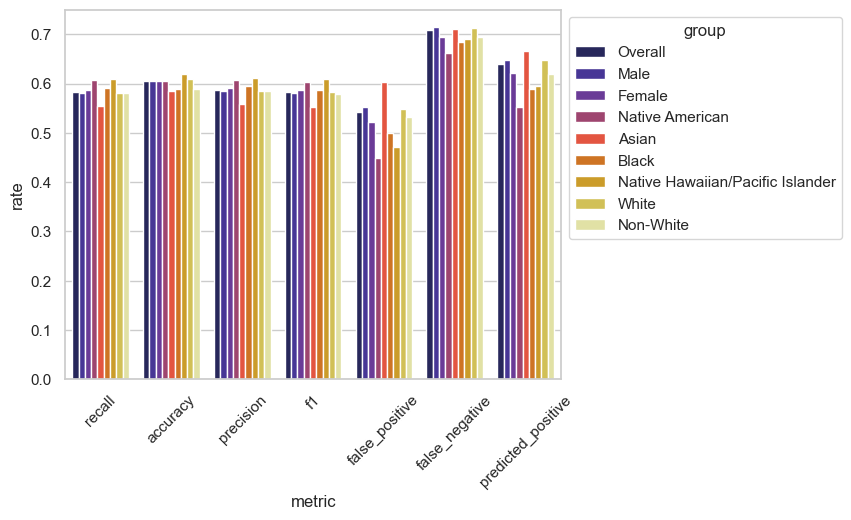

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scale features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[feats])
X_test_scaled = scaler.transform(X_test[feats])

# Model
clf_knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)  # You can tune n_neighbors
clf_knn.fit(X_train_scaled, y_train)

# Predictions
y_result_knn = clf_knn.predict(X_test_scaled)

# Reports


# Fairness metrics calculation
knn_metrics = accuracy_report(y_result_knn, y_test, X_test)
plot_fairness(knn_metrics)


Overall:
Recall: 0.5749014088406903
Accuracy: 0.5938181818181818
Precision: 0.5772226139960932
F1-score: 0.5753103222669979
---Male---
Recall: 0.5738079697402603
Accuracy: 0.5947821445252552
Precision: 0.5765094470500496
F1-score: 0.5742220487687789

---Female---
Recall: 0.5768840368034245
Accuracy: 0.5917581634108084
Precision: 0.5784633415064206
F1-score: 0.5772463789778186

---Native American---
Recall: 0.6190257096648262
Accuracy: 0.6175373134328358
Precision: 0.6194604200775227
F1-score: 0.6174294518043975

---Asian---
Recall: 0.5422959912351065
Accuracy: 0.5705039297272307
Precision: 0.544795993331638
F1-score: 0.5418426097520046

---Black---
Recall: 0.5937204789158608
Accuracy: 0.5920217588395286
Precision: 0.5961101252589885
F1-score: 0.5900652869448839

---Native Hawaiian/Pacific Islander---
Recall: 0.5804118187385181
Accuracy: 0.588957055214724
Precision: 0.5809821153253161
F1-score: 0.5806067588325653

---White---
Recall: 0.5734100404790026
Accuracy: 0.5972788054813747
Preci

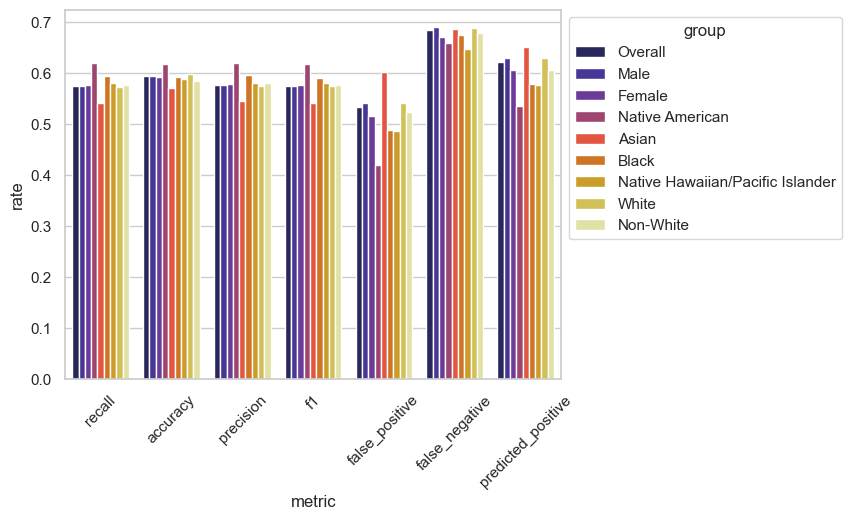

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Model
clf_rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf_rf.fit(X_train[feats], y_train)

# Predictions
y_result_rf = clf_rf.predict(X_test[feats])

# Reports
rf_metrics = accuracy_report(y_result_rf, y_test, X_test)
plot_fairness(rf_metrics)

### Analysis 4

In [47]:
# Downsampling

from sklearn.utils import resample

subgroups = get_subgroups(processed_df)

# Separate the dataframes by race
df_white = processed_df[subgroups["White"]]
df_non_white = processed_df[subgroups["Non-White"]]
# Separate the dataframes by gender and loan approval status
df_male_approved = processed_df[(subgroups["Male"] == 1) & (processed_df['originated'] == True)]
df_male_denied = processed_df[(subgroups["Male"] == 1) & (processed_df['originated'] == False)]
df_female_approved = processed_df[(subgroups["Female"] == 1) & (processed_df['originated'] == True)]
df_female_denied = processed_df[(subgroups["Female"] == 1) & (processed_df['originated'] == False)]
# Undersample the majority class for race
df_white_downsampled = resample(df_white, replace=False, n_samples=len(df_non_white))
balanced_race_df = pd.concat([df_white_downsampled, df_non_white])
# Undersample the majority class for gender and loan approval status
if len(df_male_approved) > len(df_female_approved):
    df_male_approved_downsampled = resample(df_male_approved, replace=False, n_samples=len(df_female_approved))
    balanced_approved_df = pd.concat([df_male_approved_downsampled, df_female_approved])
else:
    df_female_approved_downsampled = resample(df_female_approved, replace=False, n_samples=len(df_male_approved))
    balanced_approved_df = pd.concat([df_male_approved, df_female_approved_downsampled])

if len(df_male_denied) > len(df_female_denied):
    df_male_denied_downsampled = resample(df_male_denied, replace=False, n_samples=len(df_female_denied))
    balanced_denied_df = pd.concat([df_male_denied_downsampled, df_female_denied])
else:
    df_female_denied_downsampled = resample(df_female_denied, replace=False, n_samples=len(df_male_denied))
    balanced_denied_df = pd.concat([df_male_denied, df_female_denied_downsampled])

# Combine the balanced dataframes
balanced_df = pd.concat([balanced_race_df, balanced_approved_df, balanced_denied_df])

# Create X and y for the balanced dataset
Xs_b = balanced_df[feats]
Ys_b = balanced_df['originated']

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Split Data
X_train_b, _, y_train_b, _ = train_test_split(Xs_b, Ys_b, test_size=0.33)

# Train Model
neigh_b = KNeighborsClassifier(n_neighbors=3)
neigh_b.fit(X_train_b[feats], y_train_b)

# Predictions
y_result_neigh_b = neigh_b.predict(X_test[feats].values)

/Users/emie/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Overall:
Recall: 0.6695476018107833
Accuracy: 0.6832121212121212
Precision: 0.6724819248816335
F1-score: 0.6706901127494178
---Male---
Recall: 0.6443345843897756
Accuracy: 0.6598830097195347
Precision: 0.6469958467448071
F1-score: 0.6453383974497726

---Female---
Recall: 0.7228785277295275
Accuracy: 0.733067160986739
Precision: 0.7262264574381345
F1-score: 0.724236009620741

---Native American---
Recall: 0.7986448050861636
Accuracy: 0.7985074626865671
Precision: 0.7982954545454546
F1-score: 0.7983699059561129

---Asian---
Recall: 0.7570563350722019
Accuracy: 0.7716134997688395
Precision: 0.7634941550320324
F1-score: 0.7596799096765923

---Black---
Recall: 0.7842984014209591
Accuracy: 0.7831368993653672
Precision: 0.7870190116007851
F1-score: 0.7828006302395379

---Native Hawaiian/Pacific Islander---
Recall: 0.7542865890998163
Accuracy: 0.7607361963190185
Precision: 0.7571207430340557
F1-score: 0.7554341553495172

---White---
Recall: 0.6506676906772162
Accuracy: 0.6686029512095281
Preci

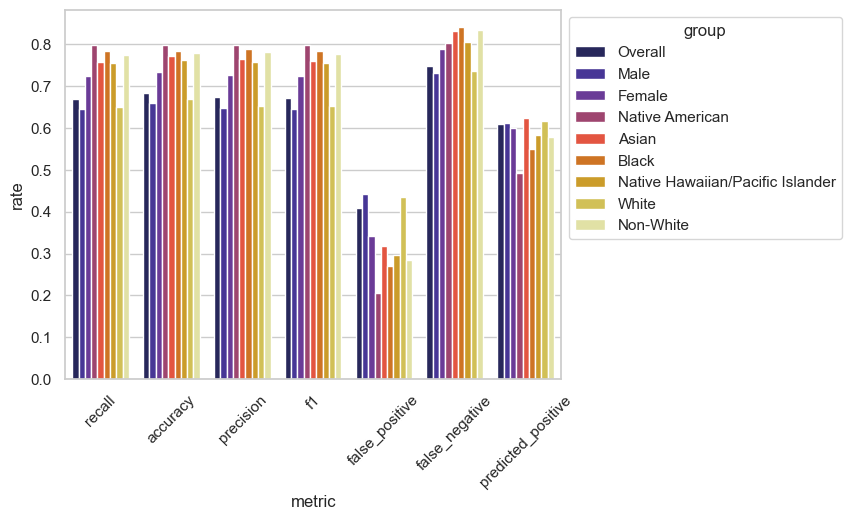

In [49]:
# Reports
knn_b_metrics = accuracy_report(y_result_neigh_b, y_test, X_test)
plot_fairness(knn_b_metrics)

### Analysis 5

In [50]:
# Train Model
clf_rf_b = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf_rf_b.fit(X_train_b[feats], y_train_b)

# Predictions
y_result_rf_b = clf_rf_b.predict(X_test[feats])

Overall:
Recall: 0.7854510085260215
Accuracy: 0.7935606060606061
Precision: 0.7874817660085407
F1-score: 0.7863916691630732
---Male---
Recall: 0.7517079024821836
Accuracy: 0.7618157959120126
Precision: 0.7539168443999288
F1-score: 0.7527135774385285

---Female---
Recall: 0.8568545399984482
Accuracy: 0.8614002566661914
Precision: 0.8582816306642845
F1-score: 0.8575360415233662

---Native American---
Recall: 0.9024315431375829
Accuracy: 0.9029850746268657
Precision: 0.9033087413369103
F1-score: 0.9027562626474077

---Asian---
Recall: 0.8907865460308088
Accuracy: 0.897364771151179
Precision: 0.8949045616305402
F1-score: 0.8926998941715708

---Black---
Recall: 0.8853654364844419
Accuracy: 0.8848594741613781
Precision: 0.8856040894199897
F1-score: 0.8848555975545765

---Native Hawaiian/Pacific Islander---
Recall: 0.8912278015921618
Accuracy: 0.8926380368098159
Precision: 0.8906148496312432
F1-score: 0.8909125675223482

---White---
Recall: 0.766569730652618
Accuracy: 0.7778600807001813
Preci

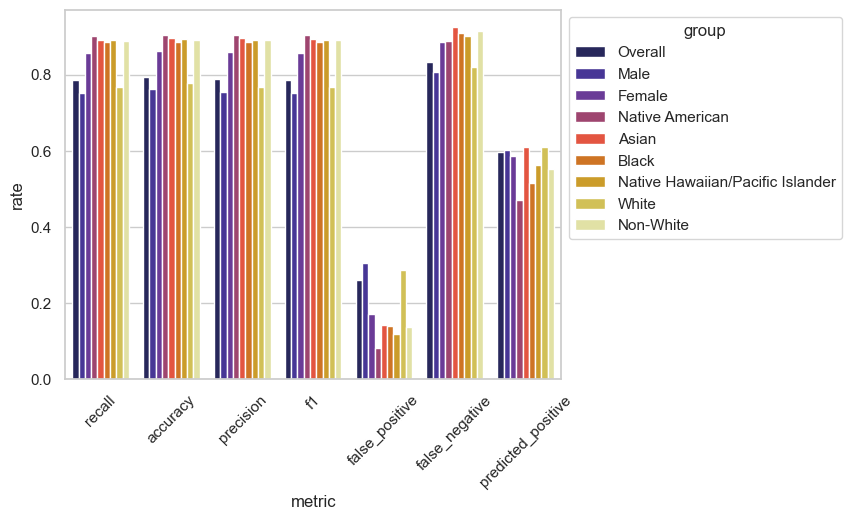

In [51]:
# Reports
rf_b_metrics = accuracy_report(y_result_rf_b, y_test, X_test)
plot_fairness(rf_b_metrics)

### Plots

#### Metrics Across Models

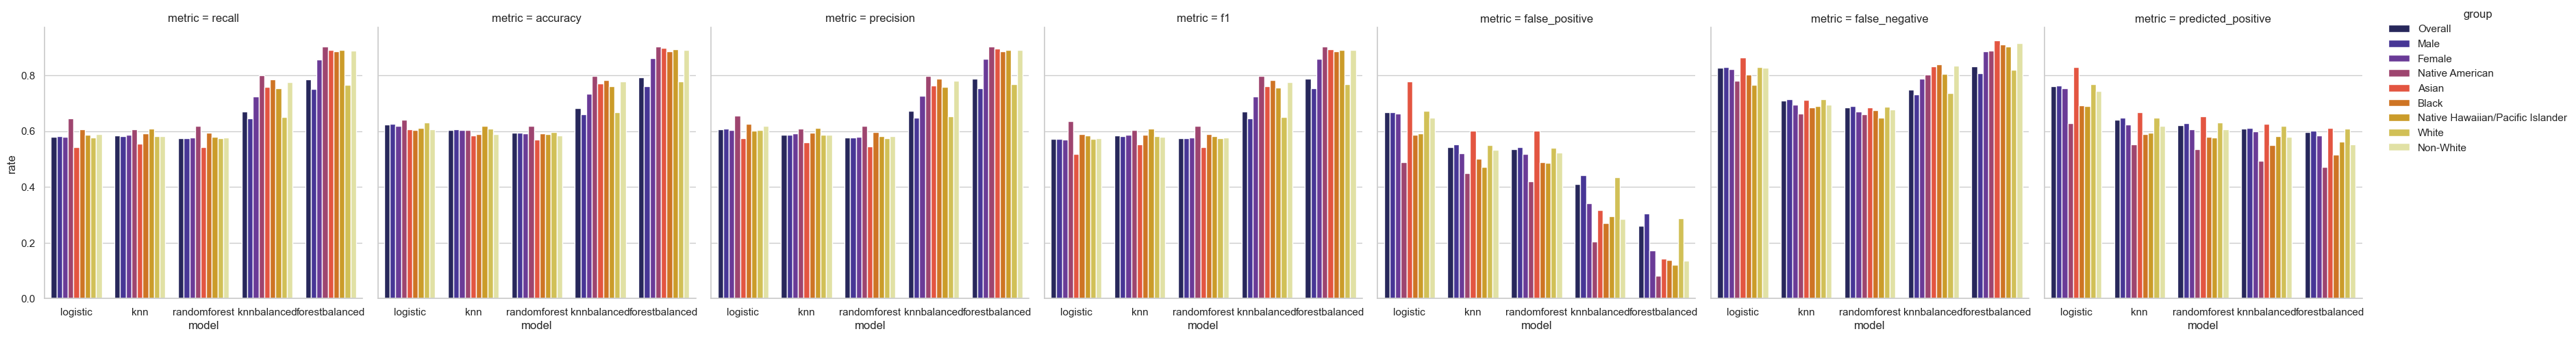

In [52]:
model_metrics = [lr_metrics, knn_metrics, rf_metrics, knn_b_metrics, rf_b_metrics]
labels = ['logistic', 'knn', 'randomforest', 'knnbalanced', 'forestbalanced']

for i in range(len(model_metrics)):
    model_metrics[i]["model"] = labels[i]

aggregate_df = pd.concat(model_metrics, ignore_index=True)

df = pd.melt(aggregate_df, id_vars=["group", "model"], var_name="metric", value_name="rate")

sns.set_theme(style="whitegrid")
g = sns.catplot(x='model', y='rate', hue='group', kind = 'bar', col = 'metric', data=df, palette="CMRmap")
sns.move_legend(g, "upper right")

## 6. Results

In [61]:
df.pivot(index = ["model", "group"], columns="metric", values="rate")

metric                                           accuracy        f1  \
model          group                                                  
forestbalanced Asian                             0.897365  0.892700   
               Black                             0.884859  0.884856   
               Female                            0.861400  0.857536   
               Male                              0.761816  0.752714   
               Native American                   0.902985  0.902756   
               Native Hawaiian/Pacific Islander  0.892638  0.890913   
               Non-White                         0.891059  0.890195   
               Overall                           0.793561  0.786392   
               White                             0.777860  0.767169   
knn            Asian                             0.584836  0.553384   
               Black                             0.589846  0.587230   
               Female                            0.604401  0.587621   
               Male                              0.605124  0.581300   
               Native American                   0.604478  0.604031   
               Native Hawaiian/Pacific Islander  0.619632  0.609701   
               Non-White                         0.589461  0.579379   
               Overall                           0.604894  0.583468   
               White                             0.609247  0.582544   
knnbalanced    Asian                             0.771613  0.759680   
               Black                             0.783137  0.782801   
               Female                            0.733067  0.724236   
               Male                              0.659883  0.645338   
               Native American                   0.798507  0.798370   
               Native Hawaiian/Pacific Islander  0.760736  0.755434   
               Non-White                         0.778567  0.775676   
               Overall                           0.683212  0.670690   
               White                             0.668603  0.651452   
logistic       Asian                             0.606565  0.518742   
               Black                             0.603264  0.589693   
               Female                            0.617805  0.569893   
               Male                              0.625698  0.572058   
               Native American                   0.639925  0.635509   
               Native Hawaiian/Pacific Islander  0.610429  0.583426   
               Non-White                         0.606652  0.573283   
               Overall                           0.623182  0.571404   
               White                             0.630163  0.571009   
randomforest   Asian                             0.570504  0.541843   
               Black                             0.592022  0.590065   
               Female                            0.591758  0.577246   
               Male                              0.594782  0.574222   
               Native American                   0.617537  0.617429   
               Native Hawaiian/Pacific Islander  0.588957  0.580607   
               Non-White                         0.584509  0.575980   
               Overall                           0.593818  0.575310   
               White                             0.597279  0.573939   

metric                                           false_negative  \
model          group                                              
forestbalanced Asian                                   0.924266   
               Black                                   0.909630   
               Female                                  0.885480   
               Male                                    0.807587   
               Native American                         0.887597   
               Native Hawaiian/Pacific Islander        0.902174   
               Non-White                               0.915009   
               Overall                                 0.83

### Analysis 1
Overall Performance:\
The model has mediocre performance with its overall metrics being in the high 50% range. This suggests that the model is only slightly better than random at predicting whether a loan gets approved or not. The recall is approximately 60% which indicates that the model correctly identified positive instances around 60% of the time

Performance by Gender:\
Men have the slightly higher metrics across all categories compared to the overall average. This might supports our hypothesis that the model is slightly biased towards males, or alternatively, that the features used by the model capture the patterns better for this subgroup. 

Performance by Race:\
The Native American group exhibits notably higher recall, precision, and F1-score compared to other groups. This might indicate that the model performs better at identifying positive instances among Native Americans or that the characteristics of this subgroup align well with the model's predictors.The plot shows that the bar for Asian individuals under false positives is notably higher than for other groups, suggesting that the model is more likely to incorrectly predict loan approvals for Asians.

### Analysis 2
Overall Performance:\
The model has mediocre performance with its overall metrics being in the high 50% range. This suggests that the model is only slightly better than random at predicting whether a loan gets approved or not. The recall is approximately 60% which indicates that the model correctly identified positive instances around 60% of the time. The F1-score of 0.5832, a balance between precision and recall, confirms that the model has a moderate performance level but highlights the need for improvement.

Performance by Gender:\
The performance metrics for male and female subgroups are very close to one another, suggesting that the model does not exhibit a strong bias toward a particular gender.
Females have a marginally higher recall than males, which implies that the model is slightly better at identifying true approvals for females than for males.
Precision and F1-scores are also slightly higher for females, reinforcing the observation that the model performs slightly better for females compared to males. However, the differences are minimal, suggesting reasonable fairness between genders within the model.


Performance by Race:\
The model performs best for the Native Hawaiian/Pacific Islander subgroup, with the highest recall and F1-score. Asians have the lowest recall, accuracy, and F1-score, indicating that the model struggles most with accurately predicting loan approvals for this group. The "Non-White" category shows slightly lower performance compared to the "White" category, indicating some disparities across racial lines, with the model generally performing slightly worse for combined non-white subgroups. As for the FPR, Asian and Black subgroups have a notably higher FPR than other racial groups, implying that the model incorrectly predicts loan approvals more often for these groups. The Native Hawaiian/Pacific Islander subgroup shows a marginally higher FNR, meaning this group is slightly more likely to be denied incorrectly by the model compared to others.

### Analysis 3
Overall Performance:\
The model has mediocre performance with its overall metrics being in the high 50% range. This suggests that the model is only slightly better than random at predicting whether a loan gets approved or not. The recall is approximately 60% which indicates that the model correctly identified positive instances around 60% of the time

Performance by Gender:\
For this model, gender is nearly identical, with many of the metrics being within 0.001 of each other. This suggests that our hypothesis is wrong that males would get more loan than females in the model. This makes sense as we didn't use any sensitive features to train the model, I wouldn't expect there to be too much bias, unless that data is skewed. Looking at the false positive, false negative and predictive positive rates, performance by gender is fairly stable, however, for each of these metrics males have a bit of a lead, suggesting the model is slightly more biased towards males.

Performance by Race:\
Performance by race isn't too disparate with the lowest recall/accuracy/precision scores being approximately 54% for Asians and approximately 61% for Native Americans. We do see this tradeoff in the false positive rate where Native American applicants have a substantially lower false positive rate than Asians ~0.2. This seems to indicate that despite the very similar model performance for both of these races, Asians may be disproportionately recommended to apply for a loan more than Native American people.

### Analysis 4
Overall Performance: \
The performance of this model is pretty good with an overall accuracy/recall/precision around 70%. This suggests that the model can corectly identify whether a person gets a loan 70% of the time. 

Performance by Gender: \
Contrary to our hypothesis, females perform significantly better than males in this model with a recalll of ~73% compared to ~65%. For this model we downsampled the data, which may have caused this result. Looking at the false positive rate, males are more likely than females to have a false positive at arong 44% compared to 33%.

Performance by Race: \
We see a similar pattern as gender in race with Black and Hawaiian/Pacific Islander people having a recall of approximately 78-79% compared to 65% for white people. However, white people do have a much higher false positive rate than any of the other races ~43% compared to Black people at around 25%. 

### Analysis 5
Overall Performance: \
The overall performance of this model is exceptional with an overall recall of ~78%. Some demographics are even at 90%. This may be due to resampling and overfitting to a smaller model. This suggests, however that the model is able to predict whether a loan gets approve or not ~80% of the time accurately.

Performance by Gender: \
The inequalities are more prevelant here with men having ~30% false positive rate while females have ~ 17%. This seems to suggest that the model favors males when predicting whether they will get the loan.

Performance by Race: \
Race is a little more even across the board, however with white people having the best performance. White people have ~28% false positive rate compared to ~13% for non-white people. 


## 7. Conclusions and Limitations

From the various models that we have tested (logistic regression, KNN, random forest classifier, balanced knn, and balanced random forest classifier), we discovered that our balanced random forest classifer model is best suited for the task at hand (~78%). This suggests that having a balanced dataset leads to more accurate performance. 

Despite this, we see that our performance by gender and by race is still somewhat skewed to favor men and white people. Our performance by race is slightly better than our performance by gender in this model, suggesting that, with this dataset, race-related disparaties can be addressed through fair data sampling.

In terms of addressing our original hypothesis (white people and men will be favored by our model), we found that in most models there was a higher false negative for men than women. However, for the models trained on the balanced dataset, there was actually a higher false negative for women. Furthermore, for all the models, there was a higher false positive and accurately-predicted positive for men. For models trained on the more balanced dataset, there was in fact a bigger gap between the rate of false positives for men and women. With fair representation within the dataset, the model still favors men.

The same phenomenon is observed in the context of race. In the models trained on our unaltered dataset, we find that false positives and predicted positive rates are higher than that for non-white people. Interestingly, the false negative rates were also higher. The balanced dataset actually increased the difference between the two groups for false positive and predicted positive rates, and drastically lowered the false negative rate for white people, amplifying the bias towards white people.

Our models generally have a higher recall for women, which suggests that the approval decision for women tend to be more predictable than men. However, false positives in the context of this task are beneficial. A loan has the potential to change lives, and a person who statistically does not deserve a loan can greatly improve their lives when granted a loan, giving men and white people more "chances" in terms of financial opportunities. Therefore,  the false positive bias towards men and white people are too significant to ignore.

Thus our original hypothesis is ultimately proven correct, even when we normalized the data by adding more representation to oversampled groups.

### Limitations
We faced several limitations throughout the course of this project. For starters, because our machines and time are limited, we could not truly optimize the model training. Therefore, some models may have different statistics if trained differently (i.e. having more neighbors for KNN). 

Furthermore, our model output was also limited. We only took into account whether or not the model correctly predicted "Originated," but there were many other classes available in the Action Taken column. By including the other classes, we could have provided more insight about the types of loan application results. We wrongly assumed that "Originated" is the only output that means the loan was approved for the sake of simplifying the task, even though there were other data points that signify approval, such as "Approved but not accepted." This assumption is thus unreliable and not valid, but used to simplify our scope.

The data was also limited as it only considers two sexes: male and female and lacks information about sexual orientation. However, what a person identifies as and their orientation can affect their application and consequently their loan result. With that type of data, we could have provided some insight into the financial health or opportunities of LGBTQ+ individuals, which is also a future works application. Our assumption that only biological gender is included in the data is technically true (and thus reliable), but is not valid because self identification can potentially play a role in a person's loan approval status. While it is true to the loan approval process as a whole, a person's identity and financial responsibility can not be summarized through a series of checks and boxes as is used in the loan approval process; it is impossible to truly know a person based on an application. This points to a problem with the current loan approval process as a whole, and not necessarily a flaw in our study.

## 9. Sources cited

[1] Investopedia. 5 Steps to Scoring a Mortgage. Article. Retrieved from https://www.investopedia.com/articles/mortgages-real-estate/08/mortgage-candidate.asp \
[2] Jung Youn Lee and Joonhyuk Yang. 2023. Leveraging gender proxies can lead to fairer credit risk predictions, SSRN Electronic Journal. doi:10.2139/ssrn.4602450. \
[3] Sonja Kelly and Mehrdad Mirpourian. 2021. Algorithmic Bias, Financial Inclusion, and Gender. Women’s World Banking Report. Women’s World Banking. Retrieved February 19, 2024 from: https://www.womensworldbanking.org/wp-content/uploads/2021/02/2021_Algorithmic_Bias_Report.pdf. \
[4] Consumer Financial Protection Bureau, February 9, 2023. Reportable HMDA Data: A Regulatory and Reporting Overview Reference Chart for
HMDA Data Collected in 2023. Retrieved April 11, 2024 from: https://files.consumerfinance.gov/f/documents/cfpb_reportable-hmda-data_regulatory-and-reporting-overview-reference-chart_2023-02.pdf. \
[5] Consumer Financial Protection Bureau, January 1, 2024. 12 CFR Part 1003 - Home Mortgage Disclosure (Regulation C). Retrieved April 11, 2024 from: https://www.consumerfinance.gov/rules-policy/regulations/1003/. \
[6] Federal Trade Commission, July 2022. How To Comply with the Privacy of Consumer Financial Information Rule of the Gramm-Leach-Bliley Act. Retrieved April 11, 2024 from:https://www.ftc.gov/business-guidance/resources/how-comply-privacy-consumer-financial-information-rule-gramm-leach-bliley-act#obligations. \
[7] Consumer Finance Protection Bureau. 2018. Download HMDA data. Retrieved April 11, 2024 from:https://www.consumerfinance.gov/data-research/hmda/historic-data/?geo=nationwide&records=all-records&field_descriptions=codes. \
[8] Consumer Financial Protection Bureau. HMDA Loan/Application Register Code Sheet. Retrieved from https://files.consumerfinance.gov/hmda-historic-data-dictionaries/lar_record_codes.pdf.